In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [ ]:
#Load Data From CSV File
churn_df = pd.read_csv("telecom_churn_clean.csv")
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


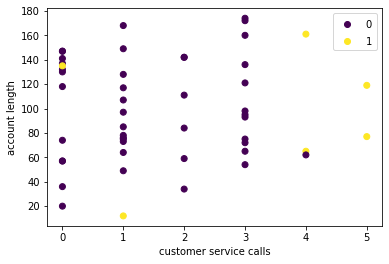

In [ ]:
n=50
colors = churn_df["churn"].values[0:n]
x_axis = churn_df["customer_service_calls"].values[0:n]
y_axis = churn_df["account_length"].values[0:n]

scatter = plt.scatter(x_axis, y_axis, c=colors)
plt.legend(*scatter.legend_elements())
plt.xlabel("customer service calls")
plt.ylabel("account length")
plt.show()

In [ ]:
print(type(churn_df))
print(churn_df.shape)
print(churn_df.columns)
print(churn_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
(3333, 20)
Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')
Unnamed: 0                  int64
account_length              int64
area_code                   int64
international_plan          int64
voice_mail_plan             int64
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_ni

In [ ]:
churn_df.describe()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,962.29855,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,833.00000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,1666.00000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,2499.00000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,3332.00000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [ ]:
print(type(churn_df[["account_length", "customer_service_calls"]]))  #pandas.core.frame.DataFrame
print(type(churn_df[["account_length", "customer_service_calls"]].values)) #numpy.ndarray

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:

# Create NumPy arrays for the features and the target variable with .values
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values
print('y shape',y.shape)
print('X shape',X.shape)
print("y[0:20]:-",y[0:20])
print("x[0:20]:-",X[0:20])

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

y shape (3333,)
X shape (3333, 2)
y[0:20]:- [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
x[0:20]:- [[128   1]
 [107   1]
 [137   0]
 [ 84   2]
 [ 75   3]
 [118   0]
 [121   3]
 [147   0]
 [117   1]
 [141   0]
 [ 65   4]
 [ 74   0]
 [168   1]
 [ 95   3]
 [ 62   4]
 [161   4]
 [ 85   1]
 [ 93   3]
 [ 76   1]
 [ 73   1]]


KNeighborsClassifier(n_neighbors=6)

In [ ]:
#Predict on unlabeled data (churn not given) 
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
print(X_new.shape)
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

(3, 2)
Predictions: [0 1 0]


In [ ]:
X = churn_df.drop("churn", axis=1).values  #all columns except churn
y = churn_df["churn"].values

# Split into training 80% and test 20% sets. random_state is seed value.
#statify: training and test subsets that have the same proportions of class labels as the input dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


In [ ]:
# What value of k is best?
# Create neighbors array 1..12, loop to fit model for each k. Maintain arrays of accuracy for plotting.
neighbors = np.arange(1, 13)  #1..12
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


In [ ]:
print(type(train_accuracies))
print(train_accuracies.values())  #type is dict_values([....]).  need to use list  function to convert to array
print(list(train_accuracies.values()))

<class 'dict'>
dict_values([1.0, 0.8885971492873218, 0.8994748687171793, 0.8750937734433608, 0.878469617404351, 0.8660915228807202, 0.8705926481620405, 0.8615903975993998, 0.86384096024006, 0.858589647411853, 0.8604651162790697, 0.8574643660915229])
[1.0, 0.8885971492873218, 0.8994748687171793, 0.8750937734433608, 0.878469617404351, 0.8660915228807202, 0.8705926481620405, 0.8615903975993998, 0.86384096024006, 0.858589647411853, 0.8604651162790697, 0.8574643660915229]


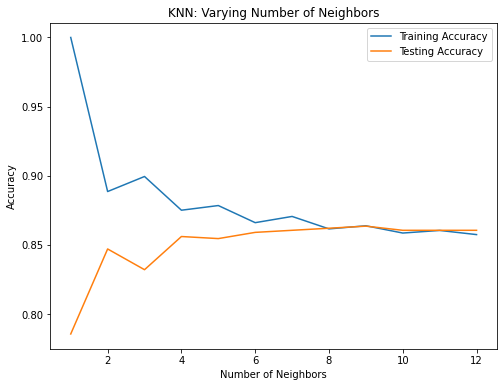

In [ ]:
# Plot  k accuracies 
plt.figure(figsize=(8,6))

#Add title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()   #training set accuracy peeks around k=9